In [62]:
from qiskit_ibm_transpiler.transpiler_service import TranspilerService
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.quantum_info import Operator
from qiskit.circuit.library import CCZGate
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt
from qiskit.transpiler import PassManager, CouplingMap
from qiskit.transpiler.passes import BasisTranslator
from qiskit import transpile
from qiskit_ibm_provider import IBMProvider
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime.fake_provider import FakeKyiv, FakeTorino
from qiskit_aer.noise import NoiseModel

In [63]:
QiskitRuntimeService.save_account(channel="ibm_quantum", token="", overwrite=True)

In [64]:
def cz(qc):
    qc.ry(-PI / 2, 0)
    qc.ry(-PI / 2, 1)
    qc.ry(PI / 2, 2)

    qc.rx(3*PI / 4, 0)
    qc.rx(PI / 2, 1)
    qc.rx(PI / 4, 2)

    qc.rxx(PI / 4, 0, 2)

    qc.rxx(PI / 4, 1, 2)

    qc.r(-2*PI / 3, PI-P, 1)

    qc.rxx(PI / 2, 0, 1)

    qc.r(-2*PI / 3, PI - P, 1)
    qc.rxx(PI / 4, 1, 2)
    qc.r(PI, -PI / 4, 1)
    qc.rxx(PI / 2, 0, 1)
    qc.id(2)
    qc.id(2)
    qc.ry(PI / 2, 0)
    qc.ry(-PI / 2, 2)


def grover(q0, q1, q2):
    PI = np.pi
    P = np.arcsin(np.sqrt(2/3))

    qc = QuantumCircuit(3)

    qc.h(0)
    qc.h(1)
    qc.h(2)

    oracle(qc, q0, q1, q2)

    # Diffusion
    qc.h(0)
    qc.h(1)
    qc.h(2)
    qc.x(0)
    qc.x(1)
    qc.x(2)

    cz(qc)

    qc.x(0)
    qc.x(1)
    qc.x(2)

    qc.h(0)
    qc.h(1)
    qc.h(2)

    qc.measure_all()

    return qc


def oracle(qc, q0, q1, q2):

    if q0 == 0:
        qc.x(0)
    if q1 == 0:
        qc.x(1)
    if q2 == 0:
        qc.x(2)

    cz(qc)

    if q0 == 0:
        qc.x(0)
    if q1 == 0:
        qc.x(1)
    if q2 ==0:
        qc.x(2)
    

In [65]:
simulator = AerSimulator()

In [66]:
backend_ecr = FakeKyiv()
pass_manager_ecr = generate_preset_pass_manager(optimization_level=3, backend = backend_ecr)

In [67]:
backend_cz = FakeTorino()
pass_manager_cz = generate_preset_pass_manager(optimization_level=3, backend = backend_cz)

In [68]:
ecr_noise = NoiseModel.from_backend(backend_ecr)
cz_noise = NoiseModel.from_backend(backend_cz)

In [146]:
ecr_results = {}
for q0 in range(2):
    for q1 in range(2):
        for q2 in range(2):
            qc = grover(q0, q1, q2)
            transpiled_qc_ecr = pass_manager_ecr.run(qc)
            result_ecr = simulator.run(transpiled_qc_ecr, noise_model=ecr_noise).result()
            ecr_results[f"{q2}{q1}{q0}"] = result_ecr.get_counts()
            print(f"initialized {q2}, {q1}, {q0}", ecr_results[f"{q2}{q1}{q0}"] )



initialized 0, 0, 0 {'001': 43, '101': 44, '110': 38, '100': 57, '011': 55, '111': 51, '010': 61, '000': 675}
initialized 1, 0, 0 {'001': 38, '010': 45, '000': 61, '110': 47, '101': 45, '011': 36, '111': 52, '100': 700}
initialized 0, 1, 0 {'001': 51, '110': 50, '100': 43, '011': 60, '111': 43, '000': 44, '010': 694, '101': 39}
initialized 1, 1, 0 {'101': 48, '011': 52, '111': 50, '100': 42, '110': 695, '000': 48, '010': 45, '001': 44}
initialized 0, 0, 1 {'100': 42, '110': 55, '101': 55, '111': 33, '011': 63, '010': 43, '000': 57, '001': 676}
initialized 1, 0, 1 {'001': 42, '111': 61, '011': 41, '100': 74, '010': 38, '000': 39, '110': 47, '101': 682}
initialized 0, 1, 1 {'001': 48, '100': 43, '110': 35, '101': 48, '000': 55, '010': 43, '111': 60, '011': 692}
initialized 1, 1, 1 {'001': 44, '110': 42, '101': 55, '100': 62, '011': 51, '111': 681, '010': 46, '000': 43}


In [ ]:
cz_results = {}
for q0 in range(2):
    for q1 in range(2):
        for q2 in range(2):
            qc = grover(q0, q1, q2)
            transpiled_qc_cz = pass_manager_cz.run(qc)
            result_cz = simulator.run(transpiled_qc_cz, noise_model=cz_noise).result()
            cz_results[f"{q2}{q1}{q0}"] = result_cz.get_counts()
            print(f"initialized {q2}, {q1}, {q0}", cz_results[f"{q2}{q1}{q0}"])

initialized 0, 0, 0 {'011': 40, '111': 45, '101': 37, '110': 40, '001': 64, '010': 52, '000': 705, '100': 41}
initialized 1, 0, 0 {'011': 38, '111': 33, '001': 46, '110': 51, '010': 47, '000': 57, '101': 58, '100': 694}
initialized 0, 1, 0 {'101': 34, '111': 38, '011': 49, '110': 59, '001': 49, '000': 47, '010': 712, '100': 36}
initialized 1, 1, 0 {'000': 33, '010': 51, '101': 48, '011': 42, '111': 47, '100': 50, '001': 43, '110': 710}
initialized 0, 0, 1 {'110': 33, '100': 37, '010': 31, '000': 51, '101': 58, '001': 729, '111': 27, '011': 58}
initialized 1, 0, 1 {'010': 38, '000': 27, '110': 40, '100': 56, '011': 49, '111': 55, '001': 47, '101': 712}
initialized 0, 1, 1 {'110': 24, '101': 36, '001': 57, '100': 36, '010': 64, '000': 42, '111': 50, '011': 715}
initialized 1, 1, 1 {'000': 32, '010': 41, '110': 36, '101': 41, '100': 48, '011': 39, '111': 756, '001': 31}


In [116]:
np.sqrt(0.705 * pos_tag) + 7 * np.sqrt(0.045 * false_tag)


np.float64(1.0046463803750187)

In [132]:
def calc_sso(pos_tag, false_tag, result_dict):
    sso = {}
    apt = {}
    for oracle_key, results in result_dict.items():
        sso[oracle_key] = 0
        for output_key, count in results.items():
            normalized_count = count/1024
            if output_key == oracle_key:
                sso[oracle_key] += (pos_tag*normalized_count)**0.5
                apt[oracle_key] = normalized_count
            else:
                sso[oracle_key] += (false_tag*normalized_count)**0.5
            # print(sso[oracle_key])
        sso[oracle_key] = sso[oracle_key]**2
    return sso, apt

In [133]:
false_tag = 0.1767766953**2

In [134]:
false_tag * 7 + pos_tag

1.0000000000380493

In [150]:
pos_tag

0.781250000029726

In [135]:
pos_tag = 0.8838834765**2

In [136]:
print(calc_sso(pos_tag, false_tag, cz_results))

({'000': 0.9867214709728402, '100': 0.9840882728756427, '010': 0.9882071869327362, '110': 0.9888598616778357, '001': 0.9883764422191015, '101': 0.9871983447137449, '011': 0.9854549041960499, '111': 0.9962691138773399}, {'000': 0.6884765625, '100': 0.677734375, '010': 0.6953125, '110': 0.693359375, '001': 0.7119140625, '101': 0.6953125, '011': 0.6982421875, '111': 0.73828125})


In [153]:
print(calc_sso(pos_tag, false_tag, ecr_results))


({'000': 0.9797443384593431, '100': 0.9859743272324797, '010': 0.9851581821715406, '110': 0.9862995287674932, '001': 0.9789309019007851, '101': 0.9793127539534757, '011': 0.984149617759976, '111': 0.9818085517686611}, {'000': 0.6591796875, '100': 0.68359375, '010': 0.677734375, '110': 0.6787109375, '001': 0.66015625, '101': 0.666015625, '011': 0.67578125, '111': 0.6650390625})


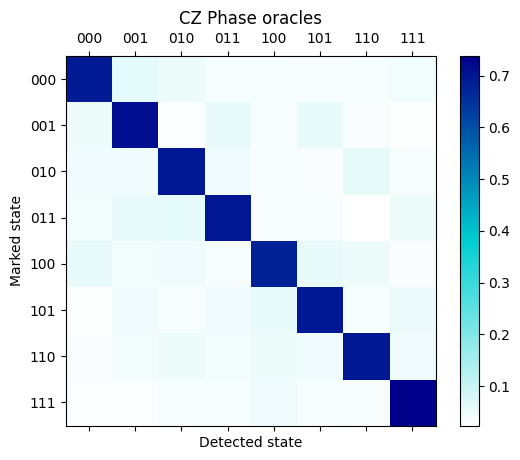

In [151]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Create a 4x4 grid of values (representing different detected states)
data = [[cz_results[f"{i}{j}{k}"][f"{l}{m}{n}"]/1024 for l in range(2) for m in range(2) for n in range(2)] for i in range(2) for j in range(2) for k in range(2)]

colors = ["#FFFFFF","#00CED1", "#00008B"] 
cmap = LinearSegmentedColormap.from_list("darkblue_to_turquoise", colors)

# Create a figure and axes
fig, ax = plt.subplots()

# Display the data using the custom color map
cax = ax.matshow(data, cmap=cmap)

# Add a colorbar
fig.colorbar(cax)

# Set the axis labels
ax.set_xticks(np.arange(8))
ax.set_yticks(np.arange(8))

# Add the detected state labels along x-axis and phase oracles label
ax.set_xticklabels(['000', '001', '010', '011', '100', '101', '110', '111'])
ax.set_yticklabels(['000', '001', '010', '011', '100', '101', '110', '111'])

# Set title and axis labels
ax.set_title('CZ Phase oracles')
ax.set_xlabel('Detected state')
ax.set_ylabel('Marked state')

# Show the plot
plt.show()

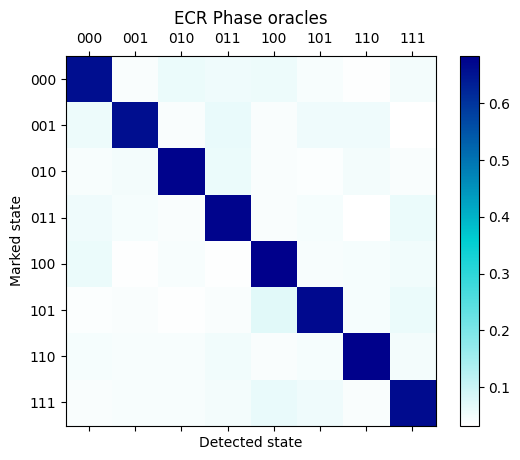

In [148]:
# Create a 4x4 grid of values (representing different detected states)
data = [[ecr_results[f"{i}{j}{k}"][f"{l}{m}{n}"]/1024 for l in range(2) for m in range(2) for n in range(2)] for i in range(2) for j in range(2) for k in range(2)]

colors = ["#FFFFFF","#00CED1", "#00008B"] 
cmap = LinearSegmentedColormap.from_list("darkblue_to_turquoise", colors)

# Create a figure and axes
fig, ax = plt.subplots()

# Display the data using the custom color map
cax = ax.matshow(data, cmap=cmap)

# Add a colorbar
fig.colorbar(cax)

# Set the axis labels
ax.set_xticks(np.arange(8))
ax.set_yticks(np.arange(8))

# Add the detected state labels along x-axis and phase oracles label
ax.set_xticklabels(['000', '001', '010', '011', '100', '101', '110', '111'])
ax.set_yticklabels(['000', '001', '010', '011', '100', '101', '110', '111'])

# Set title and axis labels
ax.set_title('ECR Phase oracles')
ax.set_xlabel('Detected state')
ax.set_ylabel('Marked state')

# Show the plot
plt.show()